# Question 2 - Analysis 2
- Collect the data of Archive API and store it as json file
- For a period of years, analyses the data in articles and which topics were trending in ceontext of Mr. Donald Trump

In [12]:
import os
import glob
from email.parser import Parser
import email.utils
import csv
import json
from datetime import datetime
import collections
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
data_path = os.path.expanduser('~')
data_path = os.path.join(data_path, 'midterm')
data_path = os.path.join(data_path, 'data')
path1 = os.path.join(data_path,'Archive_2016')
path2 = os.path.join(data_path,'Archive_2015')
path3 = os.path.join(data_path,'Archive_2014')

In [7]:
files = glob.glob(path1+ '\\' + '*' + '.json')
files1 = glob.glob(path2+ '\\' + '*' + '.json')
files2 = glob.glob(path3+ '\\' + '*' + '.json')
#print(files)

In [4]:
content = ''
all_content = ''
words_ss_freq = {}
words_ss = []
#OutputFile = open ('Trump_Articles.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
#recordwriter = csv.writer(OutputFile)
#recordwriter.writerow(['Headline' , 'Section', 'Web URL'] )
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            if ('Donald') in main_h or ('Trump') in main_h:
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                if x.get('lead_paragraph') is not None:
                    content = x.get('lead_paragraph')
                else:
                    content = x.get('snippet')
                all_content = all_content + content
                words_list = []
                words_list = content.split()
                words_ss.extend(words_list)
#print(words_ss)
words_ss = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss]   #remove all punctuation words
words_ss = [x for x in words_ss if x]                                                      #remove epmty string from list of words
    

words_ss = [word for word in words_ss if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss:              #loop through each word 
    if word in words_ss_freq:
        words_ss_freq[word] += 1
    else:
        words_ss_freq[word] = 1
#print(words_ss_freq)

In [5]:
listOfSortedWords = []                                                           
listOfSortedWords = sorted(words_ss_freq, key=words_ss_freq.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words = listOfSortedWords[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump: ')
print(top50Words)

Top 50 words for Trump: 
['Trump', 'Mr', 'Donald', 'The', 'J', 'Republican', 'Trump’s', 'need', 'Here’s', 'said', 'know', 'day', 'campaign', 'Clinton', 'presidential', 'A', 'Hillary', 'would', 'New', 'nominee', 'could', 'election', 'candidate', 'end', 'start', 'In', 'president', '—', 'voters', 'political', 'Republicans', 'new', 'presidentelect', 'York', 'Cruz', 'one', 'debate', 'Senator', 'support', 'Ted', 'Mrs', 'candidates', 'two', 'first', 'American', 'many', 'may', 'women', 'race', 'people']


In [11]:
content_2015 = ''
all_content_2015 = ''
words_ss_freq_2015 = {}
words_ss_2015 = []
#OutputFile = open ('Trump_Articles.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
#recordwriter = csv.writer(OutputFile)
#recordwriter.writerow(['Headline' , 'Section', 'Web URL'] )
for file in files1:
    with open(file, "r") as f:
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            if ('Donald') in main_h or ('Trump') in main_h:
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                if x.get('lead_paragraph') is not None:
                    content_2015 = x.get('lead_paragraph')
                else:
                    content_2015 = x.get('snippet')
                all_content_2015 = all_content_2015 + content_2015
                words_list_2015 = []
                words_list_2015 = content_2015.split()
                words_ss_2015.extend(words_list_2015)
#print(words_ss)
words_ss_2015 = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss_2015]   #remove all punctuation words
words_ss_2015 = [x for x in words_ss_2015 if x]                                                      #remove epmty string from list of words
    

words_ss_2015 = [word for word in words_ss_2015 if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss_2015:              #loop through each word 
    if word in words_ss_freq_2015:
        words_ss_freq_2015[word] += 1
    else:
        words_ss_freq_2015[word] = 1
#print(words_ss_freq_2015)

{'may': 19, 'separated': 1, 'City': 4, 'bowls': 1, 'accompanies': 1, 'version': 2, 'labor': 1, 'participated': 2, 'scenarios': 1, 'mass': 4, 'craft': 1, 'rallying': 1, 'angst”': 1, '“too': 1, 'cloud': 1, 'names': 1, 'works': 3, 'Critics': 1, 'becoming': 2, 'donations': 1, 'behalf': 1, 'confront': 2, 'Ark': 1, 'investing': 1, 'internment': 1, 'explain': 4, 'fighter': 1, 'ineffectiveness': 1, 'gathering': 4, 'polarizing': 1, 'Maureen': 1, 'supposed': 3, 'average': 1, 'earned': 1, 'go': 11, 'per': 1, 'one': 32, 'cages': 1, 'Kasich': 5, 'refrained': 1, 'Graham': 9, 'tailgating': 1, 'expressed': 1, 'Here’s': 21, '29': 2, 'secure': 1, 'poll': 39, 'database': 2, 'little': 4, 'mingled': 1, 'pressing': 1, 'protracted': 1, 'mainstream': 3, 'TV': 5, 'supporters': 22, 'advising': 1, 'necesario': 1, 'reporter': 5, 'otros': 1, 'environment': 1, 'fairly': 1, 'appreciate': 2, '“rabid': 1, 'act': 2, 'telling': 2, 'confronted': 1, 'explains': 1, 'Little': 1, 'reach': 1, 'Victor': 1, 'Ray': 1, 'Cruz’s': 

In [12]:
listOfSortedWords_2015 = []                                                           
listOfSortedWords_2015 = sorted(words_ss_freq_2015, key=words_ss_freq_2015.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words_2015 = listOfSortedWords_2015[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump: ')
print(top50Words_2015)

Top 50 words for Trump: 
['Trump', 'Donald', 'Mr', 'J', 'Republican', 'The', 'Trump’s', 'presidential', 'said', 'campaign', 'candidate', 'New', 'A', 'candidates', 'would', 'United', 'new', 'debate', 'States', 'Bush', 'Senator', 'voters', 'poll', 'Jeb', 'Carson', 'Muslims', 'percent', 'president', 'support', 'Iowa', 'In', 'one', 'political', 'day', 'week', 'Republicans', 'immigrants', 'comments', 'Ben', 'York', '—', 'rivals', 'Clinton', 'called', 'first', 'polls', 'immigration', 'latest', 'know', 'need']


In [8]:
content_2014 = ''
all_content_2014 = ''
words_ss_freq_2014 = {}
words_ss_2014 = []
#OutputFile = open ('Trump_Articles.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
#recordwriter = csv.writer(OutputFile)
#recordwriter.writerow(['Headline' , 'Section', 'Web URL'] )
for file in files2:
    with open(file, "r") as f:
        print(file)
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            if ('Donald') in main_h or ('Trump') in main_h:
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                if x.get('lead_paragraph') is not None:
                    content_2014 = x.get('lead_paragraph')
                else:
                    content_2014 = x.get('snippet')
                all_content_2014 = all_content_2014 + content_2014
                words_list_2014 = []
                words_list_2014 = content_2014.split()
                words_ss_2014.extend(words_list_2014)
#print(words_ss)
words_ss_2014 = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss_2014]   #remove all punctuation words
words_ss_2014 = [x for x in words_ss_2014 if x]                                                      #remove epmty string from list of words
    

words_ss_2014 = [word for word in words_ss_2014 if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss_2014:              #loop through each word 
    if word in words_ss_freq_2014:
        words_ss_freq_2014[word] += 1
    else:
        words_ss_freq_2014[word] = 1
print(words_ss_freq_2014)

C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_1.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_10.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_11.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_12.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_2.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_3.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_4.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_5.json
C:\Users\jaina\Documents\Study Material\Data Analysis using Python\Midterm\ExamData\Archive_2014\2014_6.json
C:\Users\jaina\D

In [10]:
listOfSortedWords_2014 = []                                                           
listOfSortedWords_2014 = sorted(words_ss_freq_2014, key=words_ss_freq_2014.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words_2014 = listOfSortedWords_2014[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump: ')
print(top50Words_2014)

Top 50 words for Trump: 
['The', 'Mr', 'Donald', 'said', 'New', 'company', 'would', 'Trump', 'A', 'York', 'fastfood', 'McDonald’s', 'restaurant', 'last', 'chain', 'Sterling', 'McDonald', 'sales', 'States', 'workers', 'group', 'one', 'also', 'many', 'owner', 'pay', 'former', 'work', 'used', 'first', 'two', 'president', 'elderly', 'National', 'federal', 'Tuesday', 'away', 'like', 'role', 'Tony', 'Chicago', 'Ms', 'groom', 'Club', 'Dr', 'time', 'young', 'government', 'general', 'City']


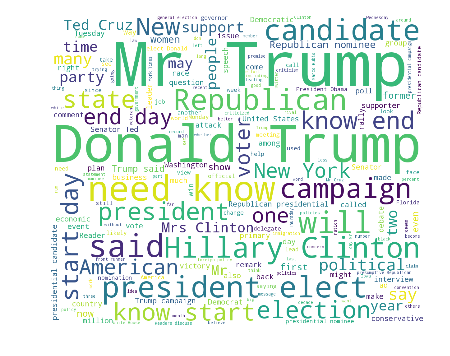

In [8]:

wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()


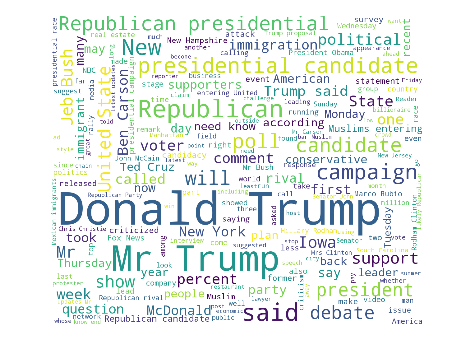

In [13]:
wordcloud_2015 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content_2015)


plt.imshow(wordcloud_2015)
plt.axis('off')
plt.show()

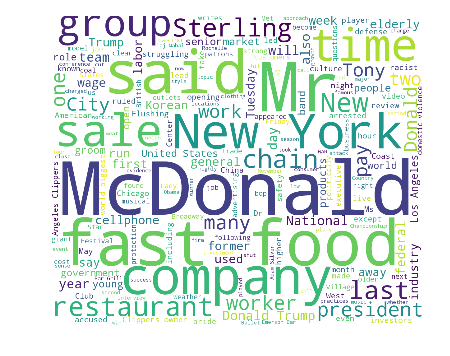

In [13]:
wordcloud_2014 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content_2014)


plt.imshow(wordcloud_2014)
plt.axis('off')
plt.show()